# Analyzing Movie Reviews
Project compares movie reviews from major movie review services: imdb, metacritic, fandango and rotten tomatoes. The purpose is to find out how unbiased the services are, and possibly pick one that is the best.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, linregress
import numpy as np
%matplotlib inline

## Initial exploration of the data

In [3]:
movies = pd.read_csv('fandango_score_comparison.csv')
movies.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


Compare Metacritic and Fandango reviews

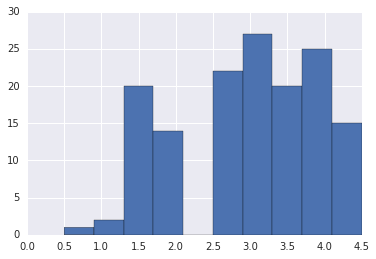

In [4]:
movies['Metacritic_norm_round'].hist();
plt.show;

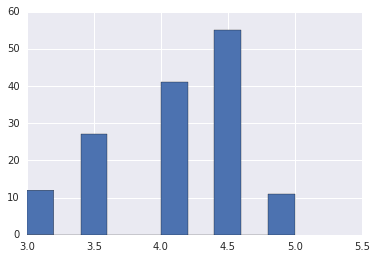

In [5]:
movies['Fandango_Stars'].hist();
plt.show;

#### Conclusion
Metacritic has all kind of review ratings starting from 0.5 up to 4.5 stars, while Fandango is greatly skewed to the right, having review ratings all high 3 to 5 stars, most of the movies having 4.5.

#### Compare metrics
Mean, median, std allow to quantify the differences.

In [6]:
Fandango_Stars_mean = movies['Fandango_Stars'].mean()
Metacritic_mean = movies['Metacritic_norm_round'].mean()
Fandango_Stars_median = movies['Fandango_Stars'].median()
Metacritic_median = movies['Metacritic_norm_round'].median()
Fandango_Stars_std = movies['Fandango_Stars'].std()
Metacritic_std = movies['Metacritic_norm_round'].std()

In [7]:
print('Fandango and Metacritic means: {} vs {}'.format(Fandango_Stars_mean,Metacritic_mean))
print('Fandango and Metacritic medians: {} vs {}'.format(Fandango_Stars_median,Metacritic_median))
print('Fandango and Metacritic std: {} vs {}'.format(Fandango_Stars_std,Metacritic_std))

Fandango and Metacritic means: 4.089041095890411 vs 2.9726027397260273
Fandango and Metacritic medians: 4.0 vs 3.0
Fandango and Metacritic std: 0.5403859779787334 vs 0.9909605613743359


Std for Fandango is much lower than that for Metacritic, all because Fandango has less spread for it's review ratings.

The comparison of the means show how most of the ratings for Fandango are concentrated near the higher end of the reviews. While Metacritic reviews are closer to the middle values.

#### Find movies that differ most
We can make a scatterplot to visualize such movies. Another way is to find difference of both columns see the largest values.

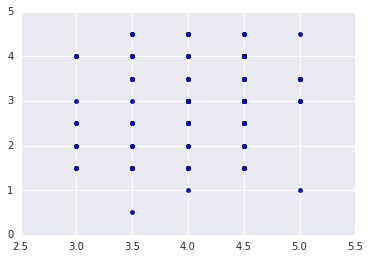

In [8]:
plt.scatter(movies['Fandango_Stars'],movies['Metacritic_norm_round']);
plt.show();

In [9]:
movies['fm_diff'] = movies['Metacritic_norm_round']-movies['Fandango_Stars']
movies['fm_diff'] = abs(movies['fm_diff'])
movies.sort_values('fm_diff', ascending=False, inplace=True)
movies.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


#### Calculate correlation
using scipy.stats pearsonr function, or just pandas df.corr()

Create linear regresion to see if Fandango can be predicted based on Metacritic score.

In [10]:
movies[['Metacritic_norm_round','Fandango_Stars']].corr()

,Metacritic_norm_round,Fandango_Stars
Metacritic_norm_round,1.000000,0.178449
Fandango_Stars,0.178449,1.000000


In [11]:
pearsonr(movies['Metacritic_norm_round'],movies['Fandango_Stars'])

(0.17844919073895918, 0.031161516228523815)

Correlation is quite low, meaning movie review differ a lot with no correlation!

Creating linear regression:

In [12]:
slope, intercept, rvalue, pvalue, stderr = linregress(movies['Metacritic_norm_round'],movies['Fandango_Stars'])

In [25]:
pred_3 = 3 * slope + intercept
print('A movie that got in metacritic 3, is predicted to get in Fandango {0:.2f}'.format(pred_3))

A movie that got in metacritic 3, is predicted to get in Fandango 4.09


Plotting Fandango predictions on a residual plot:

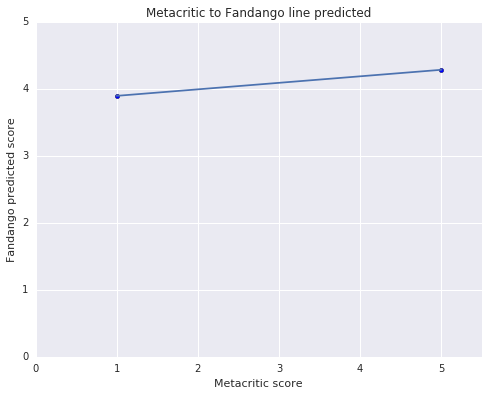

In [47]:
y = np.array([1,5])*slope + intercept

fig, ax = plt.subplots(figsize=(8,6));
ax.plot([1,5],y);
ax.set_title('Metacritic to Fandango line predicted');
ax.set_xlim(0,5.5);
ax.set_xlabel('Metacritic score')
ax.set_ylim(0,5);
ax.set_ylabel('Fandango predicted score')
ax.scatter([1,5],y)
plt.show();

In [ ]:
The predicted scores